# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Muhammad Naufal
- **Email:** naufalkz04@gmail.com
- **ID Dicoding:** muhammad_naufal_1603

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Pada jam berapa permintaan sepeda mencapai puncak dan terendah selama periode 2011-2012, dan berapa rata-rata persentase peningkatannya?
- Pertanyaan 2 : Pada jam berapa casual users memiliki rasio tertinggi dibandingkan registered users dalam data 2 tahun (2011-2012), dan bagaimana pola aktivitasnya?

## Import Semua Packages/Library yang Digunakan

In [96]:
import numpy as np # Mengimpor library NumPy untuk operasi numerik seperti array, matriks, dan perhitungan matematika
import pandas as pd # Mengimpor library Pandas untuk mengelola dan menganalisis data berbentuk tabel (DataFrame)
import matplotlib.pyplot as plt # Mengimpor modul pyplot dari Matplotlib untuk membuat grafik seperti line chart, bar chart, scatter plot, dll
import seaborn as sns # Mengimpor library Seaborn untuk visualisasi data statistik dengan tampilan yang lebih menarik

## Data Wrangling

### Gathering Data

In [97]:
days_df = pd.read_csv("Bike-sharing-dataset\day.csv") # Membaca file CSV bernama 'day.csv' yang berada di folder 'Bike-sharing-dataset'
days_df.head() # Menampilkan 5 baris pertama dari DataFrame 'days_df'

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [98]:
hours_df = pd.read_csv("Bike-sharing-dataset\hour.csv") # Membaca file CSV bernama 'hour.csv' yang berada di folder 'Bike-sharing-dataset'
hours_df.head() # Menampilkan 5 baris pertama dari DataFrame 'hours_Df'

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Berdasarkan tampilan awal dataset, diketahui bahwa dataset Bike Sharing memiliki struktur data harian dengan variabel yang mencakup faktor waktu, cuaca, dan karakteristik hari.
- Dataset ini memiliki potensi besar untuk dianalisis lebih lanjut guna mengetahui faktor-faktor yang memengaruhi jumlah penyewaan sepeda.

### Assessing Data

#### Menilai tabel hours_df

In [99]:
# memeriksa tipe data dari tiap kolom yang terdapat dalam hours_df
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [100]:
# menampilkan informasi terkait jumlah missing values
hours_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [101]:
print("Jumlah duplikasi: ", hours_df.duplicated().sum()) # memeriksa duplikasi data
hours_df.describe() # menampilkan ringkasan parameter statistik

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Dataset bersih dan siap langsung dianalisis tanpa preprocessing berat.
- Pola penggunaan sepeda kemungkinan berbeda antara jam sibuk (rush hour) dan jam non-sibuk.
- Sebagian besar penyewaan terjadi pada hari kerja, menunjukkan sepeda banyak digunakan untuk aktivitas rutin (kerja/kuliah).
- Kondisi cuaca umumnya mendukung aktivitas bersepeda, sehingga cocok untuk analisis pengaruh cuaca terhadap jumlah penyewaan.
- Sebagian besar penyewaan berasal dari registered user, mengindikasikan penggunaan sepeda sebagai transportasi rutin, bukan sekadar rekreasi.
- Jumlah penyewaan sangat fluktuatif, dipengaruhi oleh kombinasi waktu, cuaca, dan jenis hari.
- Terdapat indikasi pengaruh musim dan bulan terhadap intensitas penyewaan.

#### Menilai tabel days_df

In [102]:
# memeriksa tipe data dari tiap kolom yang terdapat dalam days_df
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [103]:
# menampilkan informasi terkait jumlah missing values
days_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [104]:
print("Jumlah duplikasi: ", days_df.duplicated().sum()) # memeriksa duplikasi data
days_df.describe() # menampilkan ringkasan parameter statistik

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

#### Membersihkan tabel hours_df

In [105]:
# memeriksa tipe data dari tiap kolom yang terdapat dalam hours_df
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [106]:
# Mengubah tipe data object (string) menjadi datetime
hours_df['dteday'] = pd.to_datetime(hours_df['dteday'])
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

#### Membersihkan table days_df

In [107]:
# memeriksa tipe data dari tiap kolom yang terdapat dalam days_df
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [108]:
# Mengubah tipe data object (string) menjadi datetime
days_df['dteday'] = pd.to_datetime(days_df['dteday'])
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Konversi kolom dteday ke tipe data datetime memastikan bahwa data waktu dapat dianalisis secara akurat.
- Langkah ini memungkinkan eksplorasi tren, pola musiman, serta perbandingan penggunaan sepeda berdasarkan periode waktu tertentu.

## Exploratory Data Analysis (EDA)

### Explore hours_df

In [109]:
hours_df.sample(5) # Menampilkan 5 baris data secara acak dari DataFrame hours_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
8442,8443,2011-12-23,1,0,12,10,0,5,1,1,0.40,0.4091,0.62,0.3582,8,96,104
3386,3387,2011-05-26,2,0,5,0,0,4,1,1,0.64,0.6061,0.73,0.1343,11,34,45
12177,12178,2012-05-27,2,1,5,14,0,0,0,1,0.76,0.7121,0.58,0.2537,317,230,547
13525,13526,2012-07-22,3,1,7,18,0,0,0,1,0.74,0.6970,0.66,0.1642,173,342,515
12400,12401,2012-06-05,2,1,6,21,0,2,1,1,0.54,0.5152,0.56,0.1642,30,253,283


In [110]:
hours_df.describe(include='all') # Menampilkan ringkasan statistik deskriptif untuk seluruh kolom

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [111]:
hours_df.instant.is_unique # Mengecek apakah setiap nilai pada kolom 'instant' bersifat unik

True

In [112]:
# Membuat kolom baru bernama 'day'
hours_df['day'] = hours_df['weekday'].map({
    0: "Sunday",
    1: "Monday",
    2: "Tuesday",
    3: "Wednesday",
    4: "Thursday",
    5: "Friday",
    6: "Saturday"
})

In [113]:
hours_df.info() # memeriksa tipe data dari tiap kolom yang terdapat dalam hours_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [114]:
hours_df.sample(5) # Menampilkan 5 baris data secara acak dari DataFrame hours_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
16767,16768,2012-12-06,4,1,12,10,0,4,1,1,0.24,0.2273,0.52,0.1940,23,122,145,Thursday
14820,14821,2012-09-14,3,1,9,17,0,5,1,1,0.72,0.6667,0.51,0.1940,137,757,894,Friday
11075,11076,2012-04-11,2,1,4,16,0,3,1,1,0.44,0.4394,0.33,0.2985,51,256,307,Wednesday
14234,14235,2012-08-21,3,1,8,7,0,2,1,1,0.60,0.5758,0.78,0.1045,19,500,519,Tuesday
10547,10548,2012-03-20,1,1,3,14,0,2,1,2,0.60,0.5909,0.73,0.1642,66,182,248,Tuesday


In [115]:
# hours_df['month'] = hours_df['mnth'].map({
#     1: "January",
#     2: "February",
#     3: "March",
#     4: "April",
#     5: "May",
#     6: "June",
#     7: "July",
#     8: "August",
#     9: "September",
#     10: "October",
#     11: "November",
#     12: "December"
# })

In [116]:
# hours_df.sample(5)

In [117]:
# Membuat kolom baru 'year'
hours_df['year'] = hours_df['yr'].map({
    0: 2011,
    1: 2012
})

In [118]:
hours_df.sample(5) # Menampilkan 5 baris data secara acak dari DataFrame hours_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,year
15223,15224,2012-10-01,4,1,10,12,0,1,1,2,0.60,0.6212,0.43,0.1642,61,262,323,Monday,2012
1096,1097,2011-02-18,1,0,2,10,0,5,1,2,0.44,0.4394,0.72,0.2239,17,78,95,Friday,2011
555,556,2011-01-25,1,0,1,8,0,2,1,2,0.16,0.1818,0.74,0.1343,5,233,238,Tuesday,2011
3540,3541,2011-06-01,2,0,6,10,0,3,1,2,0.76,0.7424,0.75,0.2537,31,84,115,Wednesday,2011
17194,17195,2012-12-24,1,1,12,6,0,1,1,1,0.20,0.2576,0.75,0.0000,1,16,17,Monday,2012


In [119]:
hours_df.info() # memeriksa tipe data dari tiap kolom yang terdapat dalam hours_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [120]:
hours_df.describe(include='all') # Menampilkan ringkasan statistik deskriptif untuk seluruh kolom

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,year
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saturday,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2512,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,NaN,2011.502561
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,2011.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,NaN,2011.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,NaN,2012.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,NaN,2012.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,NaN,2012.000000


In [121]:
# Mengelompokkan data berdasarkan hari (misalnya jam 00:00 s.d. jam 23:00)
hours_df.groupby(by='hr').agg({
    "instant": "nunique",
    "casual": ["max", "min", "mean", "std"], 
    "registered": ["max", "min", "mean", "std"]
})

instant casual                           registered                  \
   nunique    max min       mean        std        max min        mean   
hr                                                                       
0      726     68   0  10.158402  10.667953        234   0   43.739669   
1      724     49   0   6.504144   7.735334        139   0   26.871547   
2      715     44   0   4.772028   6.514780        104   0   18.097902   
3      697     26   0   2.715925   4.315795         61   0    9.011478   
4      697     13   0   1.253945   1.887669         22   0    5.098996   
5      717     16   0   1.411437   1.790581         64   0   18.478382   
6      725     19   0   4.161379   3.691509        203   0   71.882759   
7      727     40   0  11.055021   8.356205        572   1  201.009629   
8      727     69   0  21.679505  13.741229        808   4  337.331499   
9      727    142   0  30.891334  24.472856        399   6  188.418157   
10     727    209   0  46.477304  41.346206        351   8  127.191197   
11     727    268   0  59.540578  54.481788        446   5  148.602476   
12     728    362   0  68.293956  64.394237        526   3  185.021978   
13     729    355   0  72.308642  69.819228        491   9  181.352538   
14     729    361   0  75.567901  71.599225        502  12  165.381344   
15     729    357   0  74.905350  70.289359        456   4  176.327846   
16     730    367   0  73.745205  67.015206        481   8  238.238356   
17     730    347   0  74.273973  61.491021        885  14  387.178082   
18     728    266   0  61.120879  50.981553        886  20  364.390110   
19     728    230   0  48.770604  42.328913        662  11  262.752747   
20     728    237   0  36.233516  32.103347        461   8  189.796703   
21     728    222   0  28.255495  25.378252        362   6  144.059066   
22     728    175   0  22.252747  20.450211        327   5  109.082418   
23     728     71   0  15.199176  13.804596        220   2   72.631868   

                
           std  
hr              
0    34.019585  
1    27.344153  
2    21.303895  
3     9.743691  
4     3.134479  
5    12.674751  
6    53.535307  
7   157.120459  
8   229.698404  
9    84.633490  
10   66.281668  
11   79.090301  
12   89.240873  
13   87.424775  
14   84.055205  
15   84.488219  
16  103.765726  
17  211.676303  
18  203.599896  
19  138.708622  
20  100.293791  
21   73.149848  
22   55.252765  
23   40.446431

In [122]:
# Mengelompokkan data berdasarkan hari (misalnya hari ke-1 s.d. ke-31)
hours_df.groupby(by='day').agg({
    "instant": "nunique",
    "casual": ["max", "min", "mean", "std"], 
    "registered": ["max", "min", "mean", "std"]
})

instant casual                           registered                  \
          nunique    max min       mean        std        max min        mean   
day                                                                             
Friday       2487    264   0  31.458786  36.487534        757   0  164.677121   
Monday       2479    272   0  28.553449  35.097056        857   0  155.191206   
Saturday     2512    367   0  61.246815  77.020582        491   0  128.962978   
Sunday       2502    317   0  56.163469  68.090663        526   0  121.305356   
Thursday     2471    154   0  24.872521  27.768088        885   0  171.564144   
Tuesday      2453    178   0  23.580514  26.170895        871   0  167.658377   
Wednesday    2475    237   0  23.159192  27.790658        886   0  167.971313   

                       
                  std  
day                    
Friday     149.905977  
Monday     159.517897  
Saturday   108.600931  
Sunday     105.972899  
Thursday   169.327395  
Tuesday    170.103245  
Wednesday  172.344752

In [123]:
# Mengelompokkan data berdasarkan bulan (1–12)
hours_df.groupby(by='mnth').agg({
    "instant": "nunique",
    "casual": ["max", "min", "mean", "std"], 
    "registered": ["max", "min", "mean", "std"]
})

instant casual                           registered                  \
     nunique    max min       mean        std        max min        mean   
mnth                                                                       
1       1429    156   0   8.426872  15.151606        518   0   85.997901   
2       1341    229   0  11.158091  18.767280        567   0  101.706935   
3       1473    367   0  30.172437  46.148230        693   0  125.238289   
4       1437    355   0  42.311761  58.621658        697   0  144.949200   
5       1488    361   0  50.594758  59.095426        770   1  172.312500   
6       1440    297   0  51.323611  54.415890        796   0  189.191667   
7       1488    269   0  52.524866  50.278385        790   1  179.295027   
8       1475    289   0  48.840000  47.229486        811   0  189.257627   
9       1437    350   0  48.937370  59.827156        886   0  191.835769   
10      1451    362   0  41.185389  55.847805        876   1  180.973122   
11      1437    304   0  25.471816  38.800505        709   0  151.863605   
12      1483    167   0  14.627782  20.300784        737   0  127.675657   

                  
             std  
mnth              
1      91.807469  
2     104.438705  
3     133.730325  
4     144.793339  
5     153.165293  
6     161.927697  
7     158.084166  
8     170.903295  
9     177.809699  
10    171.304657  
11    140.268250  
12    130.321809

In [124]:
# Mengelompokkan data berdasarkan tahun (2011 dan 2012)
hours_df.groupby(by='year').agg({
    "instant": "nunique",
    "casual": ["max", "min", "mean", "std"], 
    "registered": ["max", "min", "mean", "std"]
})

instant casual                           registered                  \
     nunique    max min       mean        std        max min        mean   
year                                                                       
2011    8645    272   0  28.600578  38.840789        567   0  115.193869   
2012    8734    367   0  42.679757  56.970413        886   0  191.986604   

                  
             std  
year              
2011  109.461014  
2012  175.481637

In [125]:
# Mengelompokkan data berdasarkan jam (0–23) untuk mengidentifikasi jam sibuk (rush hour)
hours_df.groupby(by='hr').agg({
    "cnt": ["max", "min", "mean", "std"]
})

cnt                            
    max min        mean         std
hr                                 
0   283   2   53.898072   42.307910
1   168   1   33.375691   33.538727
2   132   1   22.869930   26.578642
3    79   1   11.727403   13.239190
4    28   1    6.352941    4.143818
5    66   1   19.889819   13.200765
6   213   1   76.044138   55.084348
7   596   1  212.064649  161.441936
8   839   5  359.011004  235.189285
9   426  14  219.309491   93.703458
10  539   8  173.668501  102.205413
11  663  10  208.143054  127.495536
12  776   3  253.315934  145.081134
13  760  11  253.661180  148.107657
14  750  12  240.949246  147.271574
15  750   7  251.233196  144.632541
16  783  11  311.983562  148.682618
17  976  15  461.452055  232.656611
18  977  23  425.510989  224.639304
19  743  11  311.523352  161.050359
20  567  11  226.030220  119.670164
21  584   6  172.314560   89.788893
22  502   9  131.335165   69.937782
23  256   2   87.831044   50.846889

In [126]:
# Mengelompokkan data berdasarkan nama hari untuk mengetahui hari dengan rata-rata penyewaan tertinggi dan terendah
hours_df.groupby(by='day').agg({
    "cnt": ["max", "min", "mean", "std"]
})

cnt                            
           max min        mean         std
day                                       
Friday     957   1  196.135907  174.076894
Monday     968   1  183.744655  179.514167
Saturday   783   1  190.209793  179.820569
Sunday     776   1  177.468825  168.167710
Thursday   976   1  196.436665  188.011923
Tuesday    970   1  191.238891  187.820480
Wednesday  977   1  191.130505  190.894464

In [127]:
# Mengelompokkan data berdasarkan bulan (1–12) untuk mengetahui bulan dengan tingkat penyewaan sepeda tertinggi
hours_df.groupby(by='mnth').agg({
    "cnt": ["max", "min", "mean", "std"]
})

cnt                            
      max min        mean         std
mnth                                 
1     559   1   94.424773   99.907146
2     610   1  112.865026  112.486565
3     957   1  155.410726  163.543050
4     822   1  187.260960  181.137902
5     873   1  222.907258  187.721497
6     900   1  240.515278  196.038950
7     913   1  231.819892  187.483806
8     941   1  238.097627  200.444648
9     977   1  240.773138  214.609531
10    963   1  222.158511  203.477057
11    729   1  177.335421  158.973887
12    759   1  142.303439  141.080674

In [128]:
# Mengelompokkan data berdasarkan tahun (2011 dan 2012) untuk membandingkan performa penggunaan sepeda antar tahun
hours_df.groupby(by='year').agg({
    "cnt": ["max", "min", "mean", "std"]
})

cnt                            
      max min        mean         std
year                                 
2011  651   1  143.794448  133.797854
2012  977   1  234.666361  208.910941

In [129]:
# Mengelompokkan data berdasarkan jam (0–23) yang diurutkan berdasarkan total penyewaan (cnt) dari yang tertinggi ke terendah
hours_df.groupby(by='hr').agg({
    "casual": "sum", 
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by='cnt', ascending=False)

,casual,registered,cnt
hr,,,
17,54220,282640,336860
18,44496,265276,309772
8,15761,245240,261001
16,53834,173914,227748
19,35505,191284,226789
13,52713,132206,184919
12,49718,134696,184414
15,54606,128543,183149
14,55089,120563,175652


In [130]:
# Mengelompokkan data berdasarkan nama hari (Monday–Sunday) yang diurutkan berdasarkan total penyewaan (cnt) untuk mengetahui hari dengan penyewaan tertinggi
hours_df.groupby(by='day').agg({
    "casual": "sum", 
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by='cnt', ascending=False)

,casual,registered,cnt
day,,,
Friday,78238,409552,487790
Thursday,61460,423935,485395
Saturday,153852,323955,477807
Wednesday,57319,415729,473048
Tuesday,57843,411266,469109
Monday,70784,384719,455503
Sunday,140521,303506,444027


In [131]:
# Mengelompokkan data berdasarkan bulan (1–12) untuk melihat pola musiman (seasonality)
hours_df.groupby(by='mnth').agg({
    "casual": "sum", 
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by='cnt', ascending=False)

,casual,registered,cnt
mnth,,,
8,72039,279155,351194
6,73906,272436,346342
9,70323,275668,345991
7,78157,266791,344948
5,75285,256401,331686
10,59760,262592,322352
4,60802,208292,269094
11,36603,218228,254831
3,44444,184476,228920


In [132]:
# Mengelompokkan data berdasarkan tahun (2011 dan 2012) untuk melihat tren pertumbuhan penggunaan sepeda
hours_df.groupby(by='year').agg({
    "casual": "sum", 
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by='cnt', ascending=False)

,casual,registered,cnt
year,,,
2012,372765,1676811,2049576
2011,247252,995851,1243103


In [133]:
# Menghitung jumlah nilai unik pada kolom 'instant' untuk setiap musim
hours_df.groupby(by='season').instant.nunique().sort_values(ascending=False)

season
3    4496
2    4409
1    4242
4    4232
Name: instant, dtype: int64

In [134]:
# Menghitung jumlah data unik (instant) pada masing-masing kategori (status hari libur)
hours_df.groupby(by='holiday').instant.nunique().sort_values(ascending=False)

holiday
0    16879
1      500
Name: instant, dtype: int64

In [135]:
# Menghitung jumlah pengamatan (instant unik) per hari
hours_df.groupby(by='weekday').instant.nunique().sort_values(ascending=False)

weekday
6    2512
0    2502
5    2487
1    2479
3    2475
4    2471
2    2453
Name: instant, dtype: int64

In [136]:
# Menghitung jumlah data unik untuk membandingkan dominasi hari kerja vs non-kerja
hours_df.groupby(by='workingday').instant.nunique().sort_values(ascending=False)

workingday
1    11865
0     5514
Name: instant, dtype: int64

In [137]:
# Menghitung jumlah data unik pada tiap kondisi cuaca untuk melihat kondisi cuaca mana yang paling sering terjadi
hours_df.groupby(by='weathersit').instant.nunique().sort_values(ascending=False)

weathersit
1    11413
2     4544
3     1419
4        3
Name: instant, dtype: int64

In [138]:
# Menyaring dan menampilkan seluruh baris data dengan kondisi cuaca 4 (hujan lebat / badai / cuaca ekstrem) untuk analisis khusus dampak cuaca ekstrem
hours_df[hours_df.weathersit == 4]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,year
585,586,2011-01-26,1,0,1,16,0,3,1,4,0.22,0.1970,0.93,0.3284,1,35,36,Wednesday,2011
8854,8855,2012-01-09,1,1,1,18,0,1,1,4,0.20,0.2273,0.86,0.0896,6,158,164,Monday,2012
9123,9124,2012-01-21,1,1,1,1,0,6,0,4,0.14,0.1364,0.86,0.1940,1,22,23,Saturday,2012


#### Pada jam berapa permintaan sepeda mencapai puncak dan terendah selama periode 2011-2012, dan berapa rata-rata persentase peningkatannya?

In [139]:
rental_by_hour = hours_df.groupby('hr').cnt.mean().sort_values(ascending=False).reset_index() # Menghitung rata-rata jumlah penyewaan sepeda (cnt) pada setiap jam
rental_by_hour['hr'] = rental_by_hour['hr'].astype(str) # Mengubah tipe data kolom 'hr' menjadi string untuk keperluan visualisasi atau penampilan label jam
rental_by_hour.head(5) # Menampilkan 5 jam dengan rata-rata penyewaan tertinggi

,hr,cnt
0,17,461.452055
1,18,425.510989
2,8,359.011004
3,16,311.983562
4,19,311.523352


In [140]:
rental_by_hour.sort_values(by="cnt", ascending=True).head(5) # Menampilkan 5 jam dengan rata-rata penyewaan terendah

,hr,cnt
23,4,6.352941
22,3,11.727403
21,5,19.889819
20,2,22.869930
19,1,33.375691


In [190]:
peak_value = rental_by_hour.cnt.max()
low_value = rental_by_hour.cnt.min()
percentage_increase = ((peak_value - low_value) / low_value) * 100
print(f"Percentage Increase: {percentage_increase:.2f}%")

Percentage Increase: 7163.60%


**Insight:**
- Hasil analisis menunjukkan bahwa permintaan tertinggi terhadap layanan bike sharing terjadi pada jam sibuk, khususnya pukul 08.00 dan 17.00 - 18.00, yang bertepatan dengan waktu berangkat dan pulang kerja.
- Sebaliknya, permintaan terendah terjadi pada dini hari (01.00 - 05.00), yang mengindikasikan minimnya aktivitas transportasi pada jam tersebut.
- Pada waktu dini hari (01.00 - 05.00) merupakan waktu yang ideal untuk maintenance sepeda, redistribusi armada, pembersihan dan inspeksi karena permintaan sangat rendah.

**Note:**
- Jam dengan permintaan rendah **tidak berarti tidak penting**, tapi **tidak kritikal (tidak berdampak signifikan) secara bisnis**.

#### Pada jam berapa casual users memiliki rasio tertinggi dibandingkan registered users dalam data 2 tahun (2011-2012), dan bagaimana pola aktivitasnya?

In [141]:
avg_users_active = (hours_df.groupby("hr")[["casual", "registered"]].mean().reset_index()) # Menghitung rata-rata jumlah pengguna casual dan registered per jam
avg_users_active # Menampilkan tabel rata-rata pengguna casual dan registered per jam

,hr,casual,registered
0,0,10.158402,43.739669
1,1,6.504144,26.871547
2,2,4.772028,18.097902
3,3,2.715925,9.011478
4,4,1.253945,5.098996
5,5,1.411437,18.478382
6,6,4.161379,71.882759
7,7,11.055021,201.009629
8,8,21.679505,337.331499
9,9,30.891334,188.418157


In [142]:
# Menghitung rasio pengguna casual terhadap total pengguna
avg_users_active["casual_ratio"] = (
    avg_users_active["casual"] /
    (avg_users_active["casual"] + avg_users_active["registered"])
)

casual_ratio = avg_users_active.casual_ratio.max() # Mengambil nilai rasio casual tertinggi
hour = avg_users_active.loc[avg_users_active["casual_ratio"].idxmax(), 'hr'] # Mengambil jam (hr) yang memiliki rasio casual tertinggi

# Menampilkan hasil analisis dalam format yang mudah dibaca
print("Jam dengan rasio casual tertinggi:")
print(f"Jam: {int(hour):02d}:00")
print(f"Casual ratio: {casual_ratio:.2%}")

Jam dengan rasio casual tertinggi:
Jam: 14:00
Casual ratio: 31.36%


**Insight:**
- Hasil analisis menunjukkan bahwa **jam 14.00 memiliki rasio casual users tertinggi (±31%)**, meskipun secara absolut (mutlak) jumlah registered users masih mendominasi. Hal ini mengindikasikan bahwa **casual users lebih aktif pada jam siang hari**, yang kemungkinan besar berkaitan dengan aktivitas rekreasi dibandingkan penggunaan sepeda sebagai sarana transportasi rutin.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada jam berapa permintaan sepeda mencapai puncak dan terendah selama periode 2011-2012, dan berapa rata-rata persentase peningkatannya?

In [143]:
hours_df.sample(5) # Menampilkan 5 baris data secara acak dari DataFrame hours_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,year
11847,11848,2012-05-13,2,1,5,20,0,0,0,2,0.66,0.6212,0.50,0.2836,67,163,230,Sunday,2012
8432,8433,2011-12-23,1,0,12,0,0,5,1,3,0.40,0.4091,0.87,0.1940,2,7,9,Friday,2011
1521,1522,2011-03-08,1,0,3,18,0,2,1,1,0.34,0.3333,0.27,0.1940,21,214,235,Tuesday,2011
12465,12466,2012-06-08,2,1,6,14,0,5,1,1,0.76,0.6667,0.31,0.3881,128,245,373,Friday,2012
3074,3075,2011-05-13,2,0,5,0,0,5,1,2,0.52,0.5000,0.83,0.1642,6,46,52,Friday,2011


In [144]:
# monthly_order_df = hours_df.resample(rule='ME', on='dteday').agg({
#     'instant': 'nunique',
#     'cnt': 'sum'
# })
# monthly_order_df.index = monthly_order_df.index.strftime('%B')
# monthly_order_df = monthly_order_df.reset_index()
# monthly_order_df.rename(columns={
#     'instant': 'order_count',
#     'cnt': 'revenue'
# }, inplace=True)
# monthly_order_df.head()

In [145]:
rental_by_hour = hours_df.groupby('hr').cnt.mean().sort_values(ascending=False).reset_index()
rental_by_hour['hr'] = rental_by_hour['hr'].astype(str)
rental_by_hour.head(10)

,hr,cnt
0,17,461.452055
1,18,425.510989
2,8,359.011004
3,16,311.983562
4,19,311.523352
5,13,253.661180
6,12,253.315934
7,15,251.233196
8,14,240.949246
9,20,226.030220


In [146]:
rental_by_hour.info() # memeriksa tipe data dari tiap kolom yang terdapat dalam rental_by_hour

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hr      24 non-null     object 
 1   cnt     24 non-null     float64
dtypes: float64(1), object(1)
memory usage: 516.0+ bytes


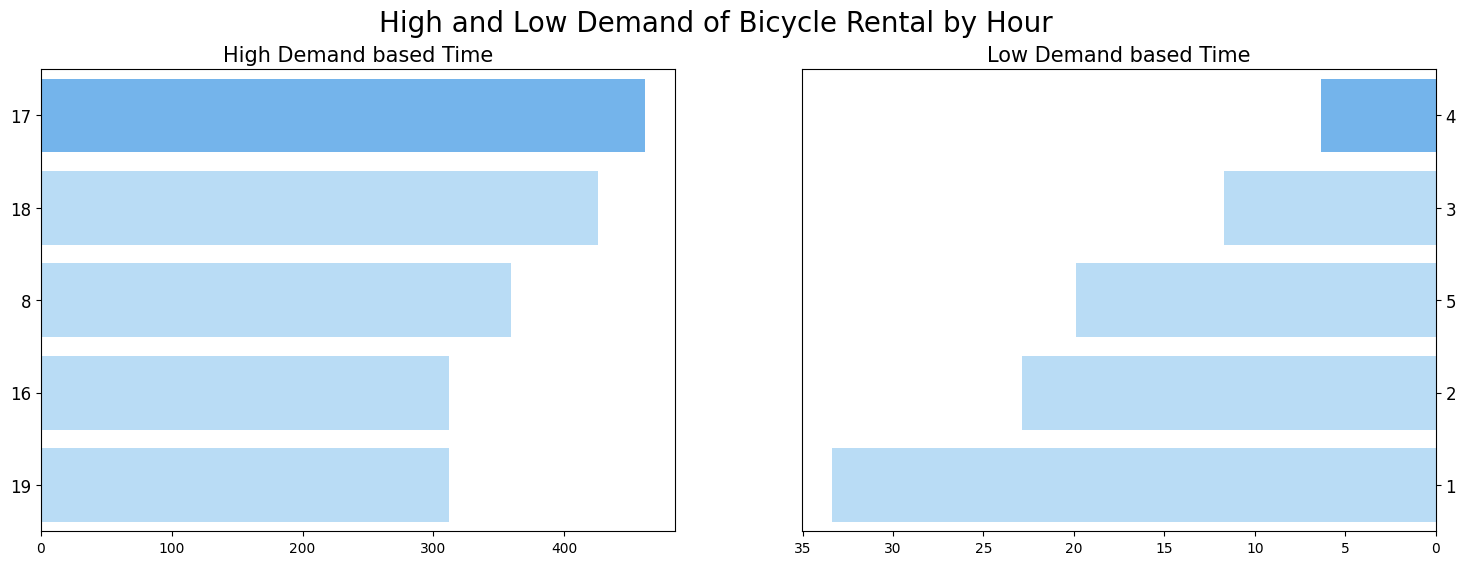

In [147]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6)) # Membuat satu figure dengan dua subplot (1 baris, 2 kolom)

colors = ["#60B5FF", "#AFDDFF", "#AFDDFF", "#AFDDFF", "#AFDDFF"] # Menentukan palet warna untuk bar chart

# Membuat bar chart untuk 5 jam dengan rata-rata penyewaan tertinggi
sns.barplot( 
    x="cnt",  # sumbu x  : rata-rata jumlah penyewaan (cnt)
    y="hr",   # sumbu y  : jam (hr)
    hue="hr", # hue='hr' digunakan agar tiap bar memiliki warna berbeda
    data=rental_by_hour.head(5), 
    palette=colors, 
    legend=False,    # legend dimatikan karena informasi jam sudah ada di sumbu y
    ax=ax[0]         # Grafik ditempatkan pada subplot kiri
)
ax[0].set_ylabel(None) # Menghapus label sumbu agar tampilan lebih bersih
ax[0].set_xlabel(None)
ax[0].set_title("High Demand based Time", loc="center", fontsize=15) # Memberi judul subplot kiri
ax[0].tick_params(axis='y', labelsize=12) # Mengatur ukuran label jam agar mudah dibaca

# Membuat bar chart untuk 5 jam dengan rata-rata penyewaan terendah
sns.barplot( 
    x="cnt", 
    y="hr", 
    hue="hr",
    data=rental_by_hour.sort_values(by="cnt", ascending=True).head(5), 
    palette=colors, 
    legend=False,
    ax=ax[1]       # Grafik ditempatkan pada subplot kanan
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()     # Membalik sumbu x agar bar mengarah ke tengah
ax[1].yaxis.set_label_position("right")  # Memindahkan label jam ke sisi kanan
ax[1].yaxis.tick_right()
ax[1].set_title("Low Demand based Time", loc="center", fontsize=15) # Memberi judul subplot kanan
ax[1].tick_params(axis='y', labelsize=12) # Mengatur ukuran label jam

plt.suptitle("High and Low Demand of Bicycle Rental by Hour", fontsize=20) # Memberi judul utama untuk keseluruhan figure
plt.show() # Menampilkan seluruh grafik

### Pertanyaan 2: Pada jam berapa casual users memiliki rasio tertinggi dibandingkan registered users dalam data 2 tahun (2011-2012), dan bagaimana pola aktivitasnya?

In [148]:
avg_users_per_hour = (hours_df.groupby("hr")[["casual", "registered"]].mean().reset_index())
avg_users_per_hour

,hr,casual,registered
0,0,10.158402,43.739669
1,1,6.504144,26.871547
2,2,4.772028,18.097902
3,3,2.715925,9.011478
4,4,1.253945,5.098996
5,5,1.411437,18.478382
6,6,4.161379,71.882759
7,7,11.055021,201.009629
8,8,21.679505,337.331499
9,9,30.891334,188.418157


In [149]:
avg_users_active["casual_ratio"] = (
    avg_users_active["casual"] /
    (avg_users_active["casual"] + avg_users_active["registered"])
)

casual_ratio = avg_users_active.casual_ratio.max()
hour = avg_users_active.loc[avg_users_active["casual_ratio"].idxmax(), 'hr']

print("Jam dengan rasio casual tertinggi:")
print(f"Jam: {int(hour):02d}:00")
print(f"Casual ratio: {casual_ratio:.2%}")

Jam dengan rasio casual tertinggi:
Jam: 14:00
Casual ratio: 31.36%


Text(0, 0.5, 'Casual Ratio')

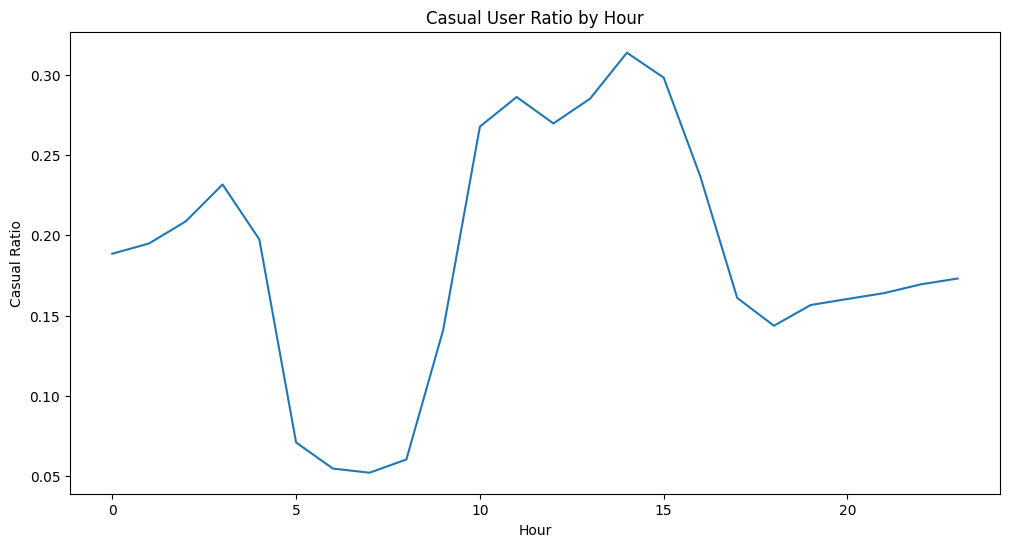

In [195]:
avg_users_active["casual_ratio"] = (
    avg_users_active["casual"] /
    (avg_users_active["casual"] + avg_users_active["registered"])
)

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(avg_users_active["hr"], avg_users_active["casual_ratio"])
ax.set_title("Casual User Ratio by Hour")
ax.set_xlabel("Hour")
ax.set_ylabel("Casual Ratio")
# st.pyplot(fig)

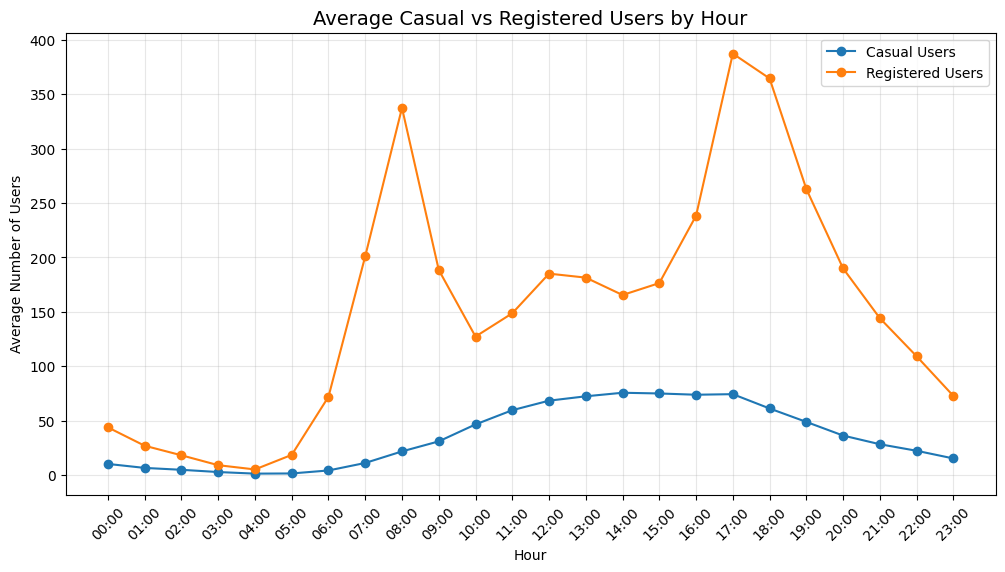

In [150]:
# Mengimpor FuncFormatter dari matplotlib untuk memformat jam menjadi format "HH:00"
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(12,6)) # Membuat figure baru dengan ukuran 12x6

# Membuat grafik garis untuk rata-rata pengguna casual per jam
plt.plot(
    avg_users_per_hour["hr"],      # sumbu x : jam (hr)
    avg_users_per_hour["casual"],  # sumbu y : rata-rata jumlah pengguna casual
    marker="o",                    # marker="o" menambahkan titik pada setiap jam
    label="Casual Users"
)

# Membuat grafik garis untuk rata-rata pengguna registered per jam
plt.plot(
    avg_users_per_hour["hr"],
    avg_users_per_hour["registered"],
    marker="o",
    label="Registered Users"
)

plt.title("Average Casual vs Registered Users by Hour", fontsize=14) # Memberikan judul grafik
plt.xlabel("Hour")                      # Label sumbu X
plt.ylabel("Average Number of Users")   # Label sumbu Y
plt.xticks(range(0, 24), rotation=45)   # Menampilkan angka 0–23 pada sumbu X

# Mengubah format label sumbu X menjadi format jam
plt.gca().xaxis.set_major_formatter(
    FuncFormatter(lambda x, _: f"{x:02d}:00")
)
plt.legend()        # Menampilkan keterangan garis (Casual vs Registered)
plt.grid(alpha=0.3) # Menambahkan garis bantu (grid) dengan transparansi ringan

plt.show() # Menampilkan grafik

In [151]:
hours_df.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,year
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,Saturday,2011
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,Saturday,2011
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,Saturday,2011
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,Saturday,2011
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,Saturday,2011


In [152]:
avg_users_per_month = (hours_df.groupby("mnth")[["casual", "registered"]].mean().reset_index())
avg_users_per_month

,mnth,casual,registered
0,1,8.426872,85.997901
1,2,11.158091,101.706935
2,3,30.172437,125.238289
3,4,42.311761,144.949200
4,5,50.594758,172.312500
5,6,51.323611,189.191667
6,7,52.524866,179.295027
7,8,48.840000,189.257627
8,9,48.937370,191.835769
9,10,41.185389,180.973122


In [ ]:
# Membuat kolom baru bernama 'month' dan mengubah kode numerik bulan (1–12) menjadi nama bulan
avg_users_per_month["month"] = avg_users_per_month["mnth"].map({
    1: "January", 2: "February", 3: "March", 4: "April",
    5: "May", 6: "June", 7: "July", 8: "August",
    9: "September", 10: "October", 11: "November", 12: "December"
})
avg_users_per_month

,mnth,casual,registered,casual_ratio,month
0,1,8.426872,85.997901,0.089244,January
1,2,11.158091,101.706935,0.098862,February
2,3,30.172437,125.238289,0.194146,March
3,4,42.311761,144.949200,0.225951,April
4,5,50.594758,172.312500,0.226977,May
5,6,51.323611,189.191667,0.213390,June
6,7,52.524866,179.295027,0.226576,July
7,8,48.840000,189.257627,0.205126,August
8,9,48.937370,191.835769,0.203251,September
9,10,41.185389,180.973122,0.185387,October


In [160]:
avg_users_per_month["casual_ratio"] = (
    avg_users_per_month["casual"] /
    (avg_users_per_month["casual"] + avg_users_per_month["registered"])
)
avg_users_per_month

,mnth,casual,registered,casual_ratio,month
0,1,8.426872,85.997901,0.089244,January
1,2,11.158091,101.706935,0.098862,February
2,3,30.172437,125.238289,0.194146,March
3,4,42.311761,144.949200,0.225951,April
4,5,50.594758,172.312500,0.226977,May
5,6,51.323611,189.191667,0.213390,June
6,7,52.524866,179.295027,0.226576,July
7,8,48.840000,189.257627,0.205126,August
8,9,48.937370,191.835769,0.203251,September
9,10,41.185389,180.973122,0.185387,October


In [161]:
# plt.figure(figsize=(15, 5))
# plt.plot(
#     avg_users_per_month["mnth"],
#     avg_users_per_month["casual"],
#     marker='o',
#     linewidth=2,
#     color="#72BCD4"
# )
# plt.title("Casual Ratio per Month", loc="center", fontsize=20)
# plt.xticks(fontsize=10)
# plt.yticks(fontsize=10)
# plt.grid(alpha=0.3)
# plt.show()

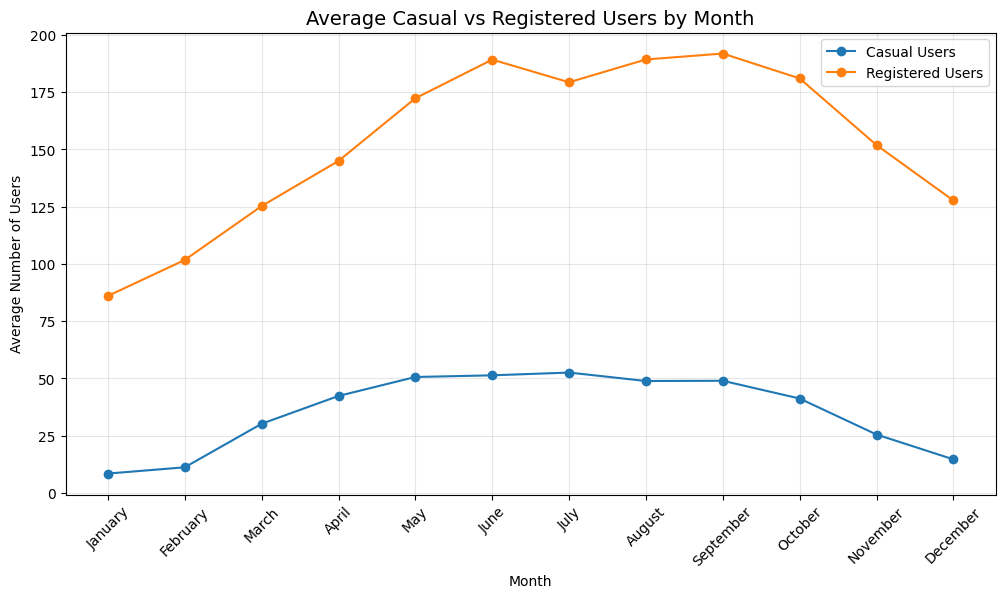

In [ ]:
plt.figure(figsize=(12,6)) # Membuat figure baru dengan ukuran 12x6

# Membuat grafik garis untuk rata-rata pengguna casual per bulan
plt.plot(
    avg_users_per_month["month"],  # sumbu x : nama bulan
    avg_users_per_month["casual"], # sumbu y : rata-rata jumlah pengguna casual
    marker="o",                    # marker="o" menampilkan titik pada setiap bulan
    label="Casual Users"
)

# Membuat grafik garis untuk rata-rata pengguna registered per bulan
plt.plot(
    avg_users_per_month["month"],
    avg_users_per_month["registered"], # sumbu y : rata-rata jumlah pengguna registered
    marker="o",
    label="Registered Users"
)

plt.title("Average Casual vs Registered Users by Month", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Average Number of Users")
plt.xticks(range(len(avg_users_per_month)), avg_users_per_month['month'], rotation=45) # Mengatur posisi dan label bulan pada sumbu X

plt.legend() # Menampilkan keterangan garis (Casual vs Registered)
plt.grid(alpha=0.3) # Menambahkan garis bantu tipis untuk memudahkan pembacaan nilai
plt.show()

In [ ]:
def bike_recommendation(df):
    # Rule 1: Cuaca buruk langsung TIDAK
    if df["weathersit"] >= 3:
        return "TIDAK"
    
    # Rule 2: Temperatur tidak ideal
    if df["temp"] < 0.3 or df["temp"] > 0.7:
        return "TIDAK"
    
    # Rule 3: Kelembapan terlalu tinggi
    if df["hum"] > 0.8:
        return "TIDAK"
    
    # Rule 4: Angin terlalu kencang
    if df["windspeed"] > 0.4:
        return "TIDAK"
    
    # Jika lolos semua rule
    return "YA"


In [ ]:
hours_df["bike_recommendation"] = hours_df.apply( # Membuat kolom baru bernama 'bike_recommendation'
    bike_recommendation, axis=1
)


In [ ]:
hours_df["bike_recommendation"].value_counts() # Menghitung jumlah kemunculan setiap kategori dalam kolom

bike_recommendation
TIDAK    9816
YA       7563
Name: count, dtype: int64

In [ ]:
# Membuat Rekomendasi Berdasarkan Agregasi Harian
daily_recommendation = (
    hours_df
    .groupby("dteday")["bike_recommendation"] # Mengelompokkan data berdasarkan tanggal (dteday)
    .apply(lambda x: "YA" if (x == "YA").mean() > 0.6 else "TIDAK") # Jika lebih dari 60% jam dalam satu hari direkomendasikan "YA", maka hari tersebut direkomendasikan "YA"
    .reset_index() # Mengubah hasil groupby menjadi DataFrame kembali
)

daily_recommendation.sample(10) # Menampilkan 10 baris acak dari hasil rekomendasi harian

,dteday,bike_recommendation
730,2012-12-31,TIDAK
395,2012-01-31,YA
366,2012-01-02,TIDAK
505,2012-05-20,YA
357,2011-12-24,YA
450,2012-03-26,TIDAK
415,2012-02-20,TIDAK
44,2011-02-14,TIDAK
269,2011-09-27,TIDAK
405,2012-02-10,TIDAK


C:\Users\Muhammad Naufal\AppData\Local\Temp\ipykernel_4952\1272103910.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


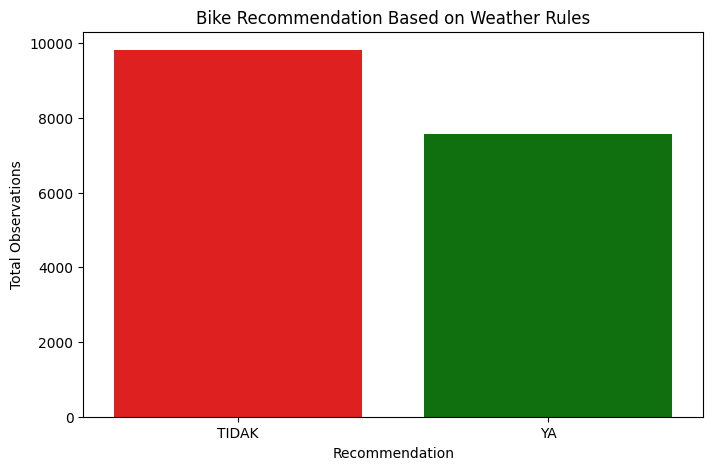

In [ ]:
plt.figure(figsize=(8,5)) # Membuat area grafik dengan ukuran 8x5

sns.countplot( # Membuat grafik batang berdasarkan jumlah frekuensi kategori.
    x="bike_recommendation", # Sumbu X berisi kategori rekomendasi (misalnya: "YA" dan "TIDAK").
    data=hours_df,           # Dataset yang digunakan
    palette=["red", "green"], # Warna batang: Merah → kemungkinan "TIDAK" | Hijau → kemungkinan "YA"
    legend=False
)
plt.title("Bike Recommendation Based on Weather Rules")
plt.xlabel("Recommendation")       # Label sumbu X
plt.ylabel("Total Observations")   # Label sumbu Y
plt.show() # Menampilkan grafik

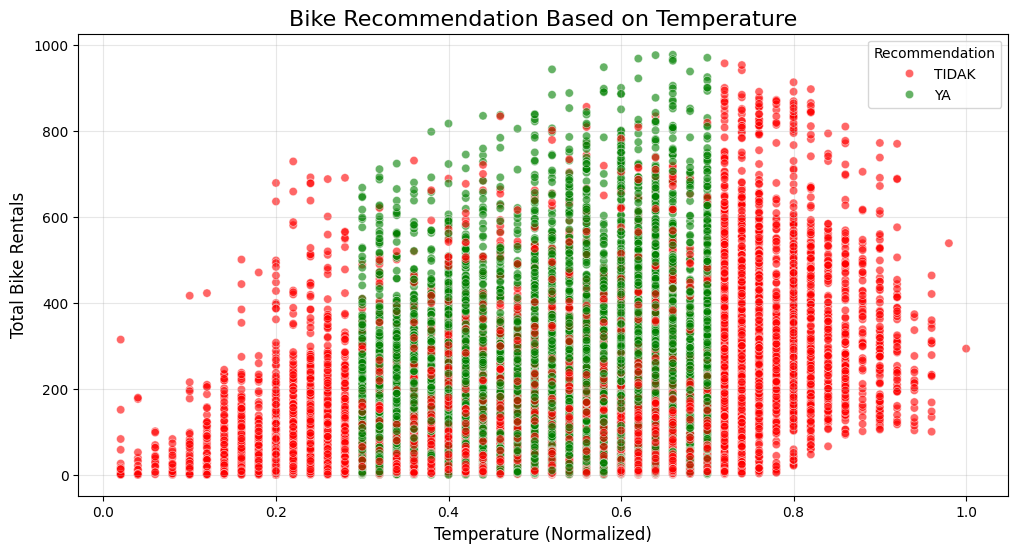

In [ ]:
plt.figure(figsize=(12,6)) 

sns.scatterplot(
    data=hours_df,
    x="temp",
    y="cnt",
    hue="bike_recommendation",
    palette={"YA": "green", "TIDAK": "red"},
    alpha=0.6
)

plt.title("Bike Recommendation Based on Temperature", fontsize=16)
plt.xlabel("Temperature (Normalized)", fontsize=12)
plt.ylabel("Total Bike Rentals", fontsize=12)
plt.legend(title="Recommendation")
plt.grid(alpha=0.3)

plt.show()

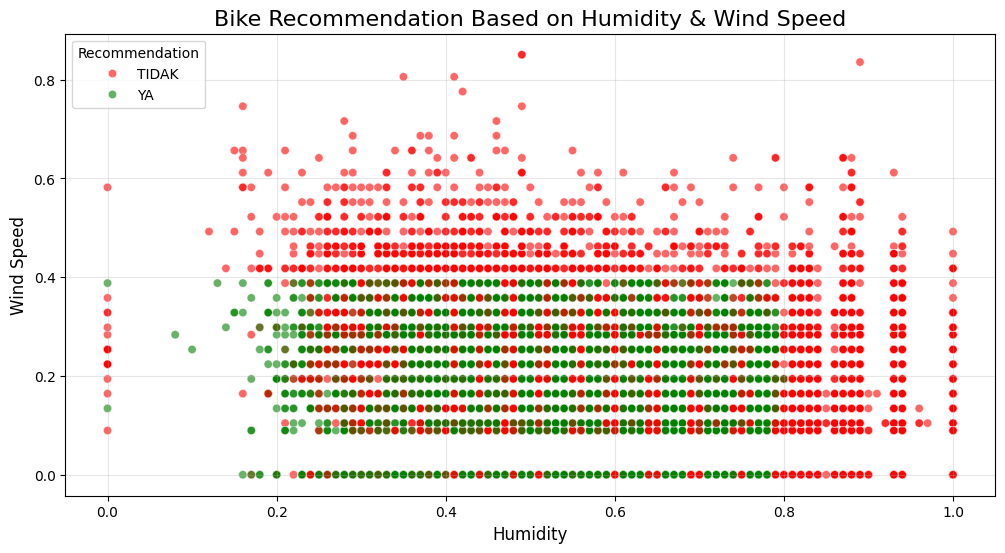

In [ ]:
plt.figure(figsize=(12,6)) # Membuat area grafik dengan ukuran 12x6

sns.scatterplot(
    data=hours_df, # Dataset yang digunakan 
    x="hum",       # Sumbu X menunjukkan suhu (dalam bentuk normalisasi 0–1)
    y="windspeed", # Sumbu Y menunjukkan total jumlah penyewaan sepeda
    hue="bike_recommendation", # Warna titik dibedakan berdasarkan hasil rekomendasi
    palette={"YA": "green", "TIDAK": "red"}, # Warna hijau untuk kondisi direkomendasikan, merah untuk tidak direkomendasikan
    alpha=0.6 # Mengatur transparansi titik agar titik yang bertumpuk tetap terlihat
)

plt.title("Bike Recommendation Based on Humidity & Wind Speed", fontsize=16) # Memberikan judul grafik
plt.xlabel("Humidity", fontsize=12)    # Label sumbu X
plt.ylabel("Wind Speed", fontsize=12)  # Label sumbu Y
plt.legend(title="Recommendation")     # Menampilkan legenda kategori warna
plt.grid(alpha=0.3)                    # Menambahkan grid agar pola lebih mudah dibaca

plt.show() # Menampilkan hasil visualisasi


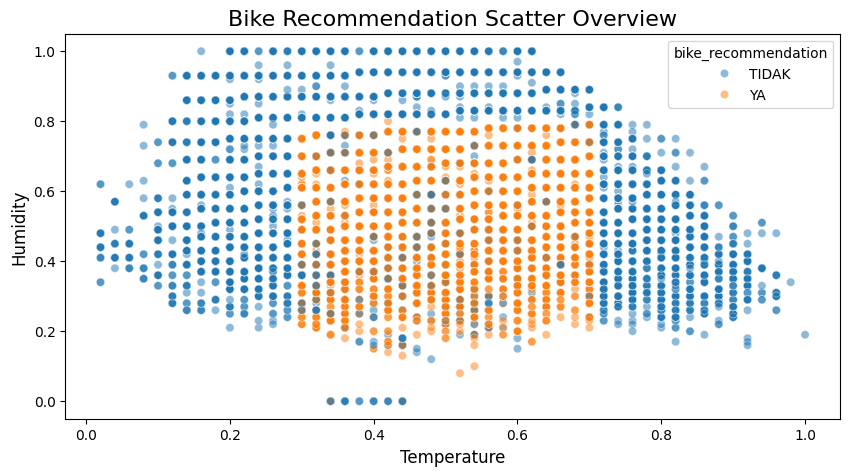

In [ ]:
plt.figure(figsize=(10,5)) # Membuat area grafik dengan ukuran 10x5

sns.scatterplot(
    x="temp",                   # Sumbu X menampilkan nilai suhu (temperature)
    y="hum",                    # Sumbu Y menampilkan nilai kelembapan (humidity)
    hue="bike_recommendation",  # Warna titik dibedakan berdasarkan hasil rekomendasi
    data=hours_df,              # Dataset yang digunakan
    alpha=0.5                   # Mengatur transparansi agar titik yang bertumpuk tetap terlihat
)

plt.title("Bike Recommendation Scatter Overview", fontsize=16) # Judul grafik
plt.xlabel("Temperature", fontsize=12)    # Label sumbu X
plt.ylabel("Humidity", fontsize=12)       # Label sumbu Y
plt.show()  # Menampilkan hasil visualisasi

In [ ]:
hours_df.sample(10) # Menampilkan 10 baris data secara acak dari DataFrame hours_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,year,bike_recommendation
1631,1632,2011-03-13,1,0,3,12,0,0,0,1,0.46,0.4545,0.38,0.3881,74,120,194,Sunday,2011,YA
13449,13450,2012-07-19,3,1,7,14,0,4,1,1,0.86,0.7879,0.44,0.0896,46,151,197,Thursday,2012,TIDAK
10371,10372,2012-03-13,1,1,3,6,0,2,1,3,0.46,0.4545,0.82,0.1940,5,108,113,Tuesday,2012,TIDAK
15224,15225,2012-10-01,4,1,10,13,0,1,1,2,0.60,0.6212,0.43,0.1642,80,225,305,Monday,2012,YA
11130,11131,2012-04-13,2,1,4,23,0,5,1,1,0.42,0.4242,0.62,0.0896,35,163,198,Friday,2012,YA
8518,8519,2011-12-26,1,0,12,16,1,1,0,1,0.36,0.3333,0.43,0.2836,28,69,97,Monday,2011,YA
4336,4337,2011-07-04,3,0,7,14,1,1,0,1,0.80,0.7273,0.46,0.0000,235,173,408,Monday,2011,TIDAK
14693,14694,2012-09-09,3,1,9,10,0,0,0,1,0.64,0.6212,0.57,0.2985,172,323,495,Sunday,2012,YA
991,992,2011-02-13,1,0,2,23,0,0,0,1,0.40,0.4091,0.35,0.3582,3,27,30,Sunday,2011,YA
2093,2094,2011-04-02,2,0,4,2,0,6,0,1,0.24,0.2424,0.75,0.1343,1,20,21,Saturday,2011,TIDAK


**Insight:**
- Faktor waktu (jam) sangat mempengaruhi pola penggunaan.
- Faktor cuaca (suhu & kelembapan) mempengaruhi intensitas penyewaan.
- Registered users lebih stabil dan mengikuti pola kerja.
- Casual users lebih fluktuatif dan dipengaruhi kondisi lingkungan.
- Rule-based bike recommendation sudah cukup selaras dengan pola data aktual.

## Analisis Lanjutan (Opsional)

RFM Analysis (customer behavior segment)
Bike-Sharing Dataset **tidak cocok untuk RFM Analysis** karena tidak ada user_id dan tidak ada harga/revenue per transaksi

Solusinya menggunakan **proxy (pendekatan)**:
-  Recency: Hari terakhir penyewaan
- Frequency: Jumlah penyewaan
- Monetary: Total sepeda yang disewa

In [172]:
# df = hours_df.copy()
# df.info()

In [173]:
# snapshot_date = df['dteday'].max() + pd.Timedelta(days=1)
# snapshot_date

In [174]:
# rfm = df.groupby(by='dteday', as_index=False).agg({
#     'instant': 'count',      # Frequency
#     'cnt': 'sum'             # Monetary (proxy)
# }).reset_index()

# rfm.rename(columns={
#     'instant': 'Frequency',
#     'cnt': 'Monetary'
# }, inplace=True)

# rfm['Recency'] = (snapshot_date - rfm['dteday']).dt.days

# rfm = rfm[['dteday', 'Recency', 'Frequency', 'Monetary']]
# rfm.head()

In [175]:
# rfm['R_Score'] = pd.qcut(
#     rfm['Recency'],
#     5,
#     labels=[5,4,3,2,1]
# )

# rfm['F_Score'] = pd.qcut(
#     rfm['Frequency'].rank(method='first'),
#     5,
#     labels=[1,2,3,4,5]
# )

# rfm['M_Score'] = pd.qcut(
#     rfm['Monetary'],
#     5,
#     labels=[1,2,3,4,5]
# )
# rfm.head()

In [176]:
# rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1])
# rfm['F_Score'] = pd.qcut(rfm['Frequency'], 5, labels=[1,2,3,4,5])
# rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5])

In [ ]:
hours_df.to_csv("all_data.csv", index=False) # Menyimpan seluruh isi DataFrame hours_df ke file bernama "all_data.csv"

## Conclusion

**Pertanyaan 1 : Pada jam berapa permintaan sepeda mencapai puncak dan terendah selama periode 2011-2012, dan berapa rata-rata persentase peningkatannya?**
- **Permintaan sepeda selama periode 2011 - 2012  mencapai puncak terjadi pada pukul 17:00** dengan rata-rata 461 unit dan **mencapai titik terendah terjadi pada pukul 04:00** dengan rata-rata 6 unit.
- Dari jam terendah (04:00) ke jam puncak (17:00) terjadi lonjakan dengan **rata-rata persentase permintaannya sebesar 7163.60%**. Hal ini menunjukkan perbedaan volume yang sangat drastis antara waktu istirahat dan waktu pulang kerja.
- Pola ini **sangat konsisten** pada tahun 2011 dan 2012 yang menunjukkan bahwa karakteristik bimodal (dua puncak) pada jam berangkat kerja (08:00) dan pulang kerja (17:00-18:00).
- Mengingat permintaan terendah terjadi pada waktu dini hari (01.00 - 05.00), maka waktu terebut merupakan waktu yang ideal untuk maintenance sepeda, redistribusi armada, pembersihan dan inspeksi karena permintaan sangat rendah.

**Note:**
- Jam dengan permintaan rendah **tidak berarti tidak penting**, tapi **tidak kritikal (tidak berdampak signifikan) secara bisnis**.

**Pertanyaan 2 : Pada jam berapa casual users memiliki rasio tertinggi dibandingkan registered users dalam data 2 tahun (2011-2012), dan bagaimana pola aktivitasnya?**
- **Pada jam 14:00 casual users memiliki rasio tertinggi dibandingkan registered users dalam data 2 tahun (2011-2012)**, dimana rata-rata rasionya sekitar ±31,36%.
- **Pola aktivitas pada jam kerja (pagi dan sore), rasio casual users berada pada titik terendah** yaitu hanya sekitar 6% - 10%, yang kemungkinan besar aktivitas di jam ini didominasi penuh oleh registered users untuk keperluan komuter. Sedangkan, **pada tengah hari (10:00-15:00), rasio casual users meningkat secara bertahap membentuk pola bell-curve**. Hal ini mengindikasikan bahwa casual users lebih aktif pada jam siang hari, yang kemungkinan besar berkaitan dengan aktivitas rekreasi dibandingkan penggunaan sepeda sebagai sarana transportasi rutin.